## Credit Card Fraud Detection - Task3

### Load transaction data

In [14]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task3_data.csv")
transaction_data.head()

,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageMerchantAmount
0,2018-06-10 04:06:00,1499,0,2018,6,10,4,6,1,2,43,31003,0,0,43,1,0,0,1,0
1,2018-06-10 04:06:00,1852,0,2018,6,10,4,6,1,1,17,60087,1,1,17,1,0,0,1,0
2,2018-06-10 04:06:00,4939,0,2018,6,10,4,6,1,1,73,67621,1,5,99,0,0,1,0,1
3,2018-06-10 04:06:00,4616,1,2018,6,10,4,6,1,1,65,49453,0,0,65,1,0,0,1,1
4,2018-06-10 04:06:00,2447,0,2018,6,10,4,6,1,1,22,39015,1,5,12,0,0,0,1,0


### Feature Importances

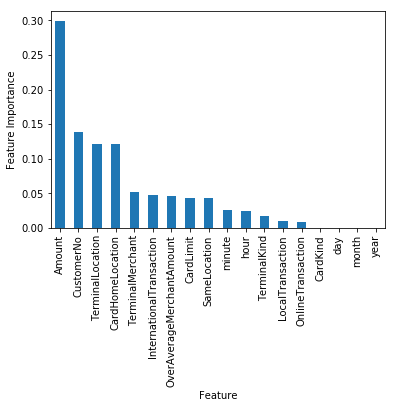

,Feature,Importance Score
0,Amount,0.299317
9,CustomerNo,0.138833
12,TerminalLocation,0.121752
8,CardHomeLocation,0.121189


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

transaction_data = shuffle(transaction_data)

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

feature_list = list(X)

feature_model = ExtraTreesClassifier()
feature_model = feature_model.fit(X, y)

feat_imp = pd.Series(feature_model.feature_importances_, feature_list).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

feature_selection_data = pd.DataFrame(
    {'Feature': feature_list,
     'Importance Score': feature_model.feature_importances_ 
    })

feature_selection_model = SelectFromModel(feature_model, prefit=True)
X_transformed = feature_selection_model.transform(X)

selected_features = feature_selection_data.sort_values(by='Importance Score', ascending=False)
selected_features.head(X_transformed.shape[1])

LR: 0.40 (0.01)
LDA: 0.36 (0.02)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.48 (0.01)
CART: 0.61 (0.01)
RF: 0.61 (0.02)
GB: 0.67 (0.01)
AB: 0.57 (0.01)
MLP: 0.65 (0.01)
NB: 0.30 (0.02)
SVM: 0.41 (0.02)


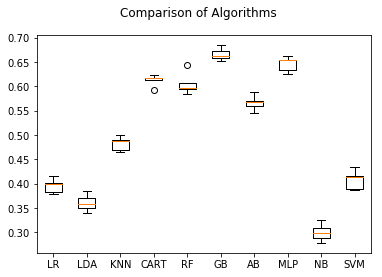

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std()))
    
fig = plt.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Train/Test(Validation) Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14393, 4) (14393,)
(3599, 4) (3599,)


### Build Prediction Model Using Chosen Classification Algorithm

In [22]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Test Prediction Model

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_test_predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)

print('*****Test*****')
print("Accuracy = %.2f" % accuracy)
print(classification_report(y_test, y_test_predicted))

*****Test*****
Accuracy = 0.92
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3236
          1       0.89      0.24      0.38       363

avg / total       0.92      0.92      0.90      3599



In [24]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_test_predicted)
tn, fp, fn, tp = results.ravel()
print('Confusion matrix:')
print(results)
print("True Positives (TP) = %d" % tp)
print("True Negatives (TN) = %d" % tn)
print("False Positives (FP) = %d (Type1 error)" % fp)
print("False Negatives (FN) = %d (Type2 error)" % fn)

Confusion matrix:
[[3225   11]
 [ 276   87]]
True Positives (TP) = 87
True Negatives (TN) = 3225
False Positives (FP) = 11 (Type1 error)
False Negatives (FN) = 276 (Type2 error)


### Balanced dataset

Number of fraudulents = 1733
Number of not fraudulents = 1733
Fraudulent ratio = 0.5000
Fraudulent percentege = 50.00%


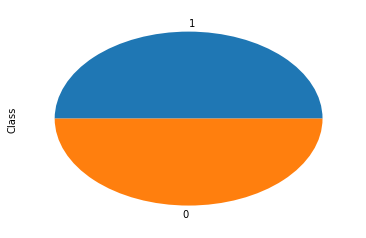

In [25]:
transaction_data_fraud = transaction_data[transaction_data.Class == 1]
number_of_fraudulents = transaction_data_fraud.shape[0]
transaction_data_normal = transaction_data[transaction_data.Class == 0].sample(n = number_of_fraudulents)
number_of_not_fraudulents = transaction_data_normal.shape[0]
 
frames = [transaction_data_fraud, transaction_data_normal]
balanced_transaction_data = pd.concat(frames)
number_of_observations = balanced_transaction_data.shape[0]
fraudulent_ratio = number_of_fraudulents / float(number_of_observations)
 
print('Number of fraudulents = {0}'.format(number_of_fraudulents))
print('Number of not fraudulents = {0}'.format(number_of_not_fraudulents))
print('Fraudulent ratio = {0:.4f}'.format(fraudulent_ratio))
print('Fraudulent percentege = {0:.2f}%'.format(fraudulent_ratio * 100))
 
number_of_is_attributed = balanced_transaction_data['Class'].value_counts()
number_of_is_attributed.plot(kind='pie')
plt.show()

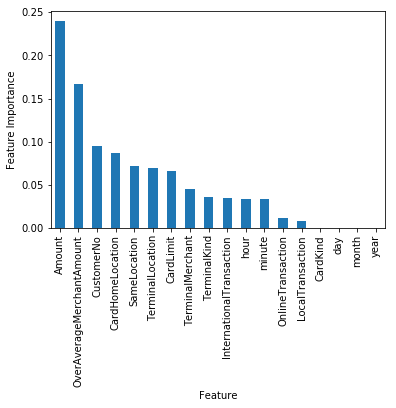

,Feature,Importance Score
0,Amount,0.239962
17,OverAverageMerchantAmount,0.167342
9,CustomerNo,0.095290
8,CardHomeLocation,0.087041
13,SameLocation,0.072109
12,TerminalLocation,0.069259
7,CardLimit,0.066059


In [26]:
X = balanced_transaction_data.drop(['Class', 'DateTime'], axis=1)
y = balanced_transaction_data['Class']

feature_list = list(X)

feature_model = ExtraTreesClassifier()
feature_model = feature_model.fit(X, y)

feat_imp = pd.Series(feature_model.feature_importances_, feature_list).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

feature_selection_data = pd.DataFrame(
    {'Feature': feature_list,
     'Importance Score': feature_model.feature_importances_ 
    })

feature_selection_model = SelectFromModel(feature_model, prefit=True)
X_transformed = feature_selection_model.transform(X)

selected_features = feature_selection_data.sort_values(by='Importance Score', ascending=False)
selected_features.head(X_transformed.shape[1])

LR: 0.78 (0.05)
LDA: 0.73 (0.06)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.71 (0.05)
CART: 0.85 (0.02)
RF: 0.85 (0.03)
GB: 0.91 (0.02)
AB: 0.89 (0.04)
MLP: 0.87 (0.04)
NB: 0.63 (0.06)
SVM: 0.78 (0.06)


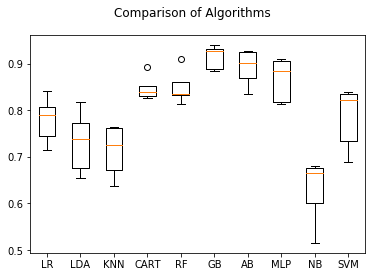

In [27]:
X = balanced_transaction_data.drop(['Class', 'DateTime'], axis=1)
y = balanced_transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std()))
    
fig = plt.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
X = balanced_transaction_data.drop(['Class', 'DateTime'], axis=1)
y = balanced_transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_test_predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)

print('*****Test*****')
print("Accuracy = %.2f" % accuracy)
print(classification_report(y_test, y_test_predicted))

*****Test*****
Accuracy = 0.92
             precision    recall  f1-score   support

          0       0.92      0.91      0.92       336
          1       0.92      0.93      0.92       358

avg / total       0.92      0.92      0.92       694



In [30]:
results = confusion_matrix(y_test, y_test_predicted)
tn, fp, fn, tp = results.ravel()
print('Confusion matrix:')
print(results)
print("True Positives (TP) = %d" % tp)
print("True Negatives (TN) = %d" % tn)
print("False Positives (FP) = %d (Type1 error)" % fp)
print("False Negatives (FN) = %d (Type2 error)" % fn)

Confusion matrix:
[[307  29]
 [ 26 332]]
True Positives (TP) = 332
True Negatives (TN) = 307
False Positives (FP) = 29 (Type1 error)
False Negatives (FN) = 26 (Type2 error)
